# Salvaged transformer core permeability characterization

## Measure effective area $A_e$

<img src="effective_area.png" width=200px>

The 'effective area' of a core represents the cross sectional area of one of its limbs. Usually this corresponds closely to the physical dimensions of the core but because flux may not be distributed completely evenly. Manufacturer will specify a value for Ae in datasheet which reflects this.

The need for the core area arises when you want to relate the flux density in the core (limited by the material type) to the total flux it carries -

$Ae = Φ / B$

## Measure effective length $l_e$

<img src="effective-length.png" width=200px>

The 'effective length' of a core is a measure of the distance which flux lines travel in making a complete circuit of it. Usually this corresponds closely to the physical dimensions of the core but because flux has a tendency to concentrate on the inside corners of the path the manufacturer will specify a value for le which reflects this.

For the EE shape transformer - red line represents the shortest path which a flux line could take to go round the core. The green line is the longest. Shown in blue is a path whose length is that of the short path plus four sectors whose radius is sufficient to take the path mid-way down the limbs.
In the picture above

$l_e = 2(3.8 + 1.2) + \pi((2.63 - 1.2) / 2) = 12.25 mm$

This is all a bit approximate; but bear in mind that since manufacturing tolerances on permeability are often 25% there isn't much point in being more exact.

## Measure inductance $L$

The initial permeability defines the relative permeability at low excitation level. According to IEC 60401 test condition : f<= 10 kHz, B < 0.25mT
Put 10 turns in the core and measure @ 10kHz

## Calculate theoretical inductance $L_0$

Some times $\Sigma l/A$ is called "Core Factor" other time "C1 effective factor"
The idea of core factor is to encapsulate in one figure the contribution to core reluctance made by the size and shape of the core. 

$\Sigma l/A = C1 = \frac{l_e}{A_e}$ $[\frac{1}{m}]$

$L_0 [H]= \frac{\mu_0*N^2*A_e}{l_e}$

$L_0 [H]= \frac{\mu_0*N^2}{C_1*1000}$

## Calculate initial permeability

You don't need to know initial permeability to plot chart of complex permeability, but you need this value to find matching core material in manufacturers datasheets.

The initial permeability can be calculated as ratio between measured inductance and calculated inductance.

Where 
$l_e$ is measured in mm, $A_e$ in $mm^2$, $L_{initial}$ in H

$\mu_0$ - magnetic constant $4*\pi*10^{-7} [\frac{T * m}{A}]$

$\mu_{initial} = \frac{L_{initial}}{L_0}$

In [370]:
import math

#measured inductance without core 1.84uH
#measured inductance with core 44uH

# measured values with ten turns
#Ae = 13.1*13 #mm^2
# see https://coil32.net/online-calculators/e-core-calculator.html
Ae=188 #mm^2
print("Ae=", Ae, "[mm2]")

#le = 2*(7.8 + 21) + 2*math.pi*6.37 #mm
# see https://coil32.net/online-calculators/e-core-calculator.html
le = 76.306 #mm
print("le=", le, "[mm]")

turns= 2 #use least turns possible to minimise self resonance effects
L= 1e-6 #H measured @ 10kHz

#The initial permeability defines the relative permeability at low excitation level.
#According to IEC 60401 test condition : f<= 10 KHz, B < 0.25mT

mu_0=4e-7*math.pi # magnetic constant 4*pi*10^-7

C1 = le/Ae # [mm^-1]
print("C1 = l/A = ", C1, "[mm^-1]")

# L0 = mu_0*turns**2*1e-3/C1 
# print("L0 = ", L0/1e-6, "[uH]")
# print("L0 = ", L0, "[H]")

# mu_init = L/L0
# print("initial magnetic permeability of the core = ", mu_init, "[dimensionless quantity]")
mu_init = L*1000 / mu_0 / turns**2 / Ae * le
print("turns = ", turns)
print("Al = ", L*1e9/turns**2)
print("initial magnetic permeability of the core = ", mu_init, "[dimensionless quantity]")


Ae= 188 [mm2]
le= 76.306 [mm]
C1 = l/A =  0.40588297872340423 [mm^-1]
turns =  2
Al =  250.0
initial magnetic permeability of the core =  80.74785297586546 [dimensionless quantity]


## Compute core factor $\Sigma A/l$

$\Sigma A/l = \frac{A_e}{l_e}$ 

In [371]:
a_over_l=Ae/le/1000;
print("A/l=",a_over_l)

A/l= 0.0024637643173538123


## Compute reluctance $R_m$
Reluctance is the ratio of Magnetomotive Force to flux -

$R_m = \frac{F_m}{\Phi}$ 

In a magnetic circuit this corresponds to Ohm's Law and resistance in an electric circuit. Compare $R_e = V / I$

Reluctance is also proportional to the core factor, $\Sigma l/A$, but inversely proportional to permeability:

$R_m = \frac{\Sigma l/A }{\mu_0*\mu_r}$

Relative permeability can be expressed as a complex quantity to capture both the ability of the core to increase flux and the core loss.

$Z = j 2 \pi  f  N^2  A_L  \frac{\mu'-j*\mu''}{\mu_{initial}}$

where $A_L = \frac{1}{R_m}$

# Take measurements of the core with VNA

* Callibrate the VNA with the testing fixture
* Setup the toroid in the testing fixture
* Configure sweep 50kHz .. 15Mhz
* Run nano-VNA, record measurements into *.s1p file (Touchstone file format)
* Process raw data with the script below

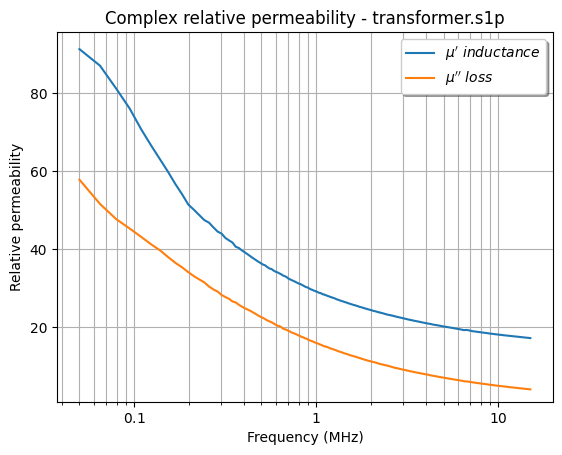

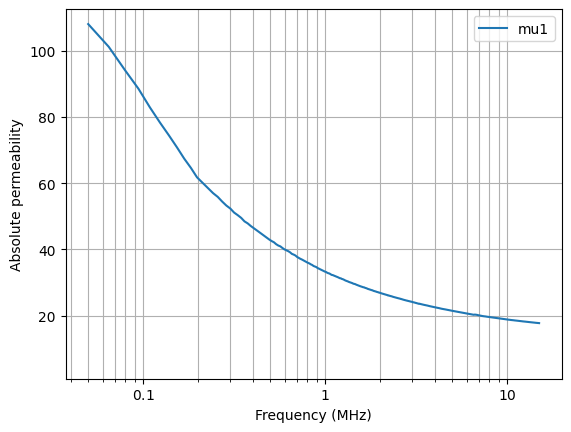

In [377]:
import matplotlib.pyplot as plt
import skrf as rf
import numpy

file1='transformer.s1p'
# file2='transformer2.s1p'
# file3='transformer3.s1p'

nw1=rf.Network(file1)
mu=(nw1.z[:,0,0]/turns**2/(2*math.pi*nw1.f))/(mu_0*a_over_l)*-1j
#mu=(nw1.z[:,0,0]/turns**2/(2*math.pi*nw1.f)/1j)/(mu_0*a_over_l)


# nw2=rf.Network(file2)
# mu2=(nw2.z[:,0,0]/turns**2/(2*math.pi*nw2.f))/(mu_0*a_over_l)*-1j


# nw3=rf.Network(file3)
# mu3=(nw3.z[:,0,0]/turns**2/(2*math.pi*nw3.f))/(mu_0*a_over_l)*-1j


plt.figure()
plt.rcParams['axes.formatter.min_exponent'] = 4
plt.plot(nw1.f/1e6,mu.real,label='mu1')
# plt.plot(nw2.f/1e6,mu.real,label='mu2')
# plt.plot(nw3.f/1e6,mu.real,label='mu3')
plt.plot(nw1.f/1e6,-mu.imag,label='mu2')
plt.xscale('log')
plt.legend()
plt.legend(('$\mu\'\ inductance$','$\mu\'\'\ loss$'),loc='upper right',shadow=True)
plt.ylim(bottom=1)
plt.ylabel('Relative permeability')
plt.xlabel('Frequency (MHz)')
plt.title('Complex relative permeability - {}'.format(file1))
plt.grid(True, which="both")
plt.show()

plt.figure()
plt.plot(nw1.f/1e6, numpy.sqrt(mu.real**2+mu.imag**2),label='mu1')
plt.grid(True, which="both")
plt.xscale('log')
plt.legend()
plt.ylim(bottom=1)
plt.ylabel('Absolute permeability')
plt.xlabel('Frequency (MHz)')

plt.show()